In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()  
%matplotlib inline

In [159]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


---

In [160]:
df = sinasc_raw[['DTNASC', 'PARTO', 'GESTACAO', 'APGAR5', 'PESO', 'ESCMAE', 'IDADEMAE', 'ESTCIVMAE', 'STCESPARTO']]
df.head()

,DTNASC,PARTO,GESTACAO,APGAR5,PESO,ESCMAE,IDADEMAE,ESTCIVMAE,STCESPARTO
0,2019-02-19,Cesáreo,37 a 41 semanas,10.0,3685,8 a 11 anos,19,5.0,2.0
1,2019-02-21,Cesáreo,37 a 41 semanas,9.0,3055,8 a 11 anos,29,2.0,2.0
2,2019-02-25,Cesáreo,37 a 41 semanas,10.0,3460,8 a 11 anos,37,9.0,2.0
3,2019-03-20,Cesáreo,37 a 41 semanas,10.0,2982,12 anos ou mais,30,5.0,1.0
4,2019-03-23,Cesáreo,37 a 41 semanas,10.0,3310,8 a 11 anos,30,2.0,1.0


In [161]:
parto_df = df[['ESCMAE', 'PARTO', 'IDADEMAE']]#'GESTACAO', 
parto_df.head()

,ESCMAE,PARTO,IDADEMAE
0,8 a 11 anos,Cesáreo,19
1,8 a 11 anos,Cesáreo,29
2,8 a 11 anos,Cesáreo,37
3,12 anos ou mais,Cesáreo,30
4,8 a 11 anos,Cesáreo,30


In [162]:
parto = parto_df.groupby(['ESCMAE', 'PARTO']).count()

IDADEMAE
ESCMAE          PARTO            
1 a 3 anos      Cesáreo       273
                Vaginal       242
12 anos ou mais Cesáreo      4698
                Vaginal      1051
4 a 7 anos      Cesáreo      2606
                Vaginal      2150
8 a 11 anos     Cesáreo     10208
                Vaginal      5399
Nenhuma         Cesáreo        19
                Vaginal        21

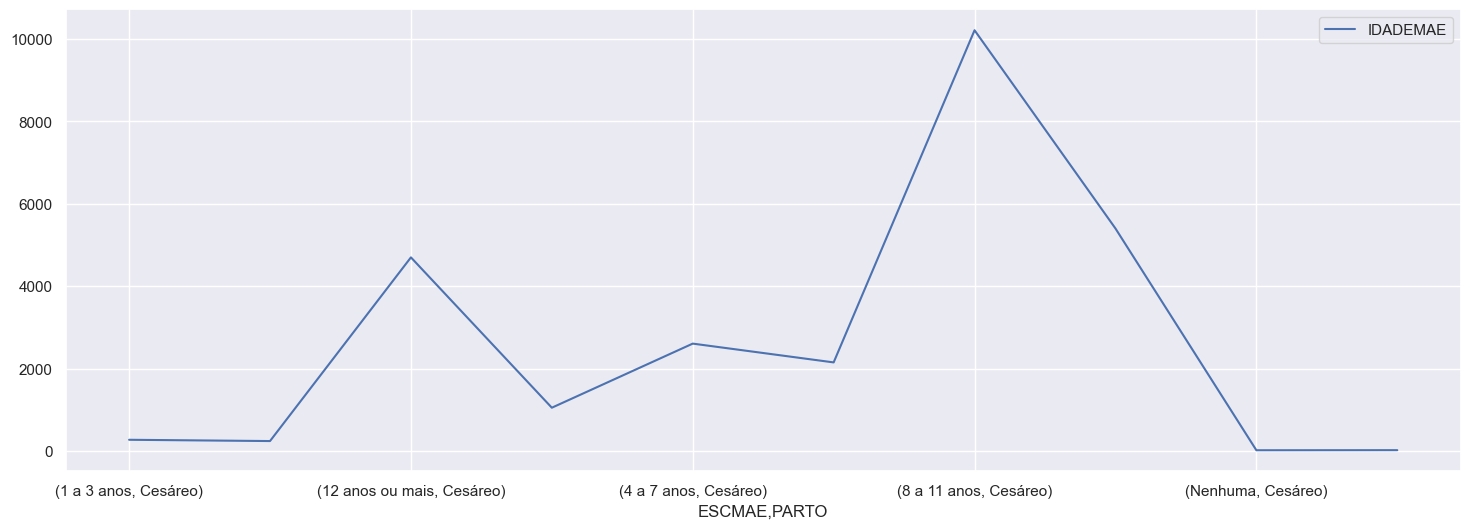

In [163]:
parto.plot(figsize=[18, 6])
parto

---

In [164]:
sinasc_1 = sinasc_raw[['ESCMAE', 'IDADEMAE']]
sinasc_1.head()

,ESCMAE,IDADEMAE
0,8 a 11 anos,19
1,8 a 11 anos,29
2,8 a 11 anos,37
3,12 anos ou mais,30
4,8 a 11 anos,30


In [165]:
esc_mae = sinasc_1.groupby('ESCMAE')

In [166]:
esc_mae.mean()

,IDADEMAE
ESCMAE,
1 a 3 anos,28.430233
12 anos ou mais,29.548119
4 a 7 anos,24.604412
8 a 11 anos,25.150387
Nenhuma,31.575000


In [167]:
sinasc_2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI']]
sinasc_2.head()

,ESCMAE,IDADEMAE,IDADEPAI
0,8 a 11 anos,19,26.0
1,8 a 11 anos,29,24.0
2,8 a 11 anos,37,32.0
3,12 anos ou mais,30,24.0
4,8 a 11 anos,30,27.0


In [168]:
sinasc_2.IDADEPAI.isna().sum()

19421

In [169]:
result = sinasc_2.dropna()

In [170]:
result.shape

(7543, 3)

In [171]:
result = sinasc_2.dropna().groupby('ESCMAE').median()
result

,IDADEMAE,IDADEPAI
ESCMAE,,
1 a 3 anos,29.0,34.0
12 anos ou mais,30.0,32.0
4 a 7 anos,26.0,30.0
8 a 11 anos,25.0,29.0
Nenhuma,31.5,38.5


In [172]:
result['DIF'] = result['IDADEPAI'] - result['IDADEMAE']
result.sort_values('DIF')#, ascending=False)

,IDADEMAE,IDADEPAI,DIF
ESCMAE,,,
12 anos ou mais,30.0,32.0,2.0
4 a 7 anos,26.0,30.0,4.0
8 a 11 anos,25.0,29.0,4.0
1 a 3 anos,29.0,34.0,5.0
Nenhuma,31.5,38.5,7.0


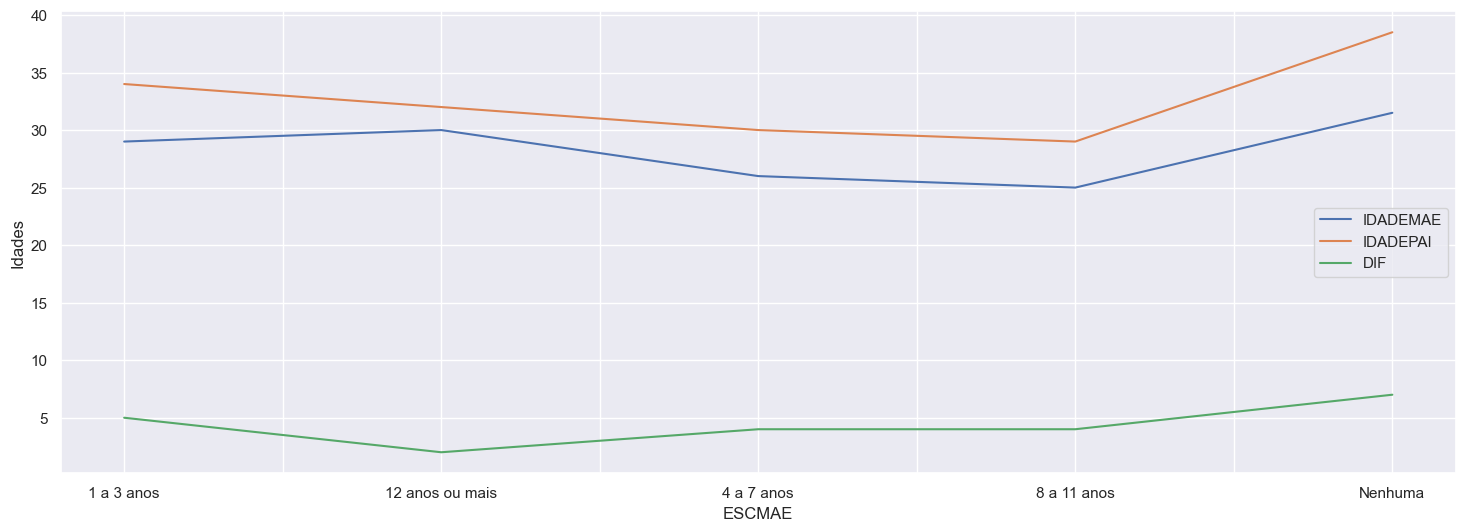

In [173]:
result.plot(figsize=[18, 6])
plt.ylabel('Idades');